# Data understanding and visualization examples
## Bank client data
### This notebook uses the *bank-additional-full.csv* dataset

(c) Nuno António 2020-2021 - Rev. 2.00

### Dataset description

Dataset related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed.

#### bank client data:
- **age**: numeric - age of the customer
- **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **education**: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing**: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- **contact**: contact communication type (categorical: 'cellular','telephone') 
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
- **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
- **cons.price.idx**: consumer price index - monthly indicator (numeric) 
- **cons.conf.idx**: consumer confidence index - monthly indicator (numeric) 
- **euribor3m**: euribor 3 month rate - daily indicator (numeric)
- **nr.employed**: number of employees - quarterly indicator (numeric)

#### subscrition info
- **y**: has the client subscribed a term deposit? (binary: 'yes','no')



More information on the dataset available at https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Initial setup and modules/packages loading

In [1]:
# Packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [3]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

### Data understanding

In [4]:
# Load data 
ds = pd.read_csv('bank-additional-full.csv', sep=";")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Display top 5 rows
ds.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Summary statistics for all variables
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check missing values
print(ds.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Summary statistics shows:
- There are no missing values (in the sense of having no empty columns). But, some binary columns wih yes and no categories, show that there are a third category, so missing values could be in that third category (e.g., **default**, **housing**, etc.).
- **Job** has 12 categories. This can indicate issues in distribution, such as some categories win many observations and others with only a few observations. **Marital** and **Education** also have a high number of categories. 

In [8]:
# Check counts of categorical variables
cols = ['default', 'housing', 'loan', 'poutcome' , 'y']
ds[cols].apply(pd.Series.value_counts)

,default,housing,loan,poutcome,y
failure,NaN,NaN,NaN,4252.0,NaN
no,32588.0,18622.0,33950.0,NaN,36548.0
nonexistent,NaN,NaN,NaN,35563.0,NaN
success,NaN,NaN,NaN,1373.0,NaN
unknown,8597.0,990.0,990.0,NaN,NaN
yes,3.0,21576.0,6248.0,NaN,4640.0


The above table shows that some categorical variables are not well balanced (e.g., **poutcome** or **y**), and that others, such as **default** have a high number of "unkowns" (missing values). These problems should be a considered in the decision to include or remove the variables from the modeling dataset.

In [9]:
# Exploration of categorical variables: CROSS TABLE of job and education
table1 = pd.crosstab(index=ds['job'], columns=ds['education'])
table1

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [10]:
# Exploration of categorical variables: CROSS TABLE 
table2 = pd.crosstab(index=ds['marital'], columns=ds['y'])
table2

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


## Data visualization examples

### DISTRIBUTION

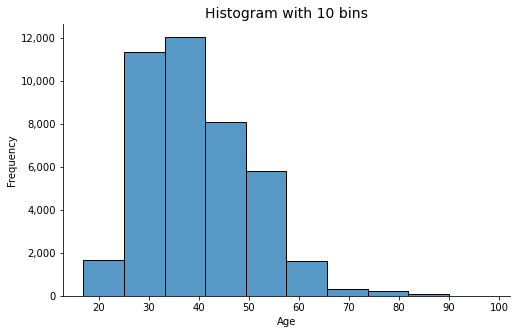

In [11]:
# HISTOGRAM

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.histplot(ds['age'], bins=10, kde=False)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Histogram with 10 bins", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'Histogram.svg', bbox_inches="tight")

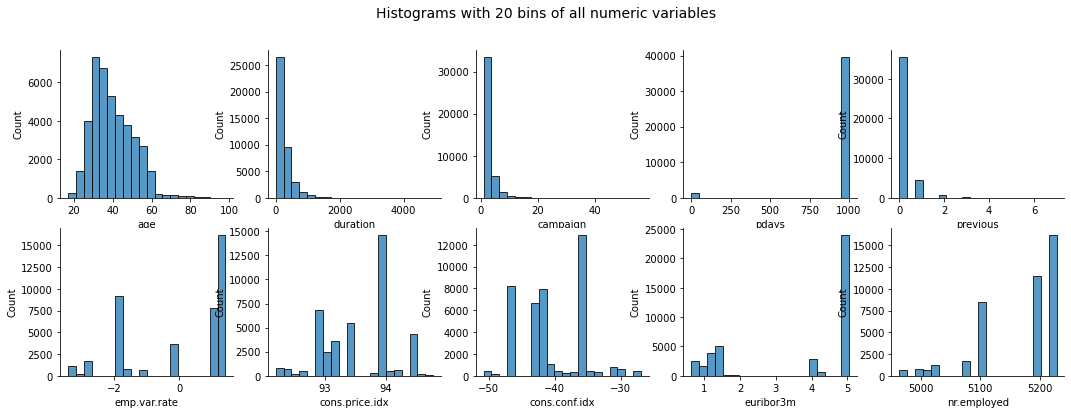

In [12]:
# HISTOGRAM (ALL NUMERIC VARIABLES)

# Identify all numeric variables in the dataset
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.histplot(data=ds,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'MultipleHistogram.svg', bbox_inches="tight")


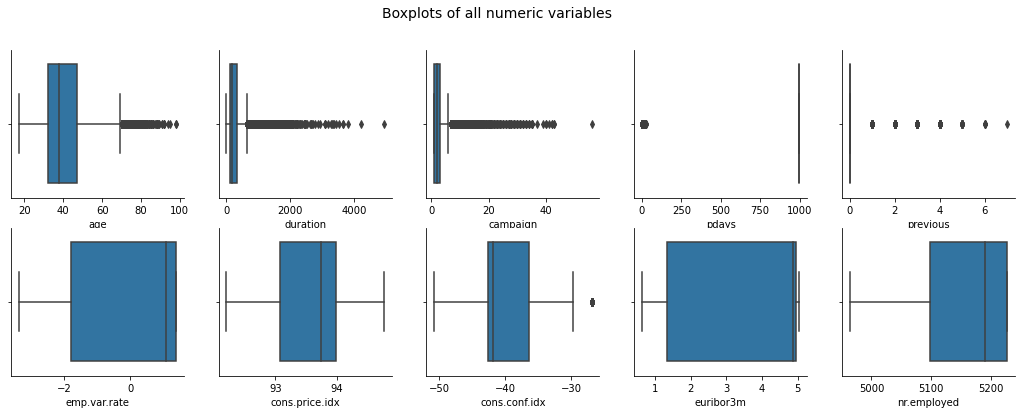

In [13]:
# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.boxplot(data=ds,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'MultipleBoxplots.svg', bbox_inches="tight")

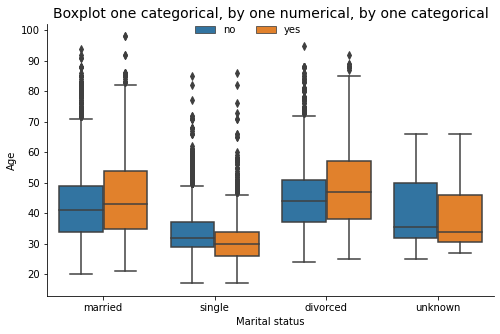

In [14]:
# BOXPLOT

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.boxplot(data=ds, x='marital', y='age', hue='y')

# Decoration
sns.despine()
plt.title("Boxplot one categorical, by one numerical, by one categorical", fontsize=plots_Title_fontSize)
plt.xlabel("Marital status")
plt.ylabel("Age")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.45, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'Boxplot2.svg', bbox_inches="tight")

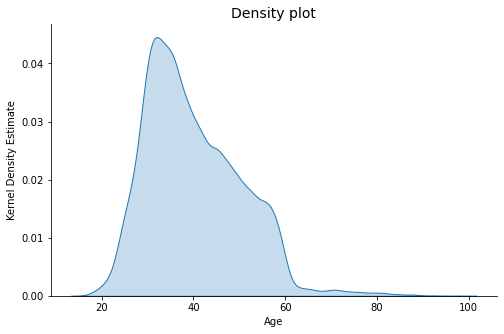

In [15]:
# DENSITY PLOT (Kernel Density Estimate)

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.kdeplot(ds['age'], shade=True, legend=False)

# Decoration
sns.despine()
plt.title("Density plot", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Kernel Density Estimate")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'DensityPlot.svg', bbox_inches="tight")

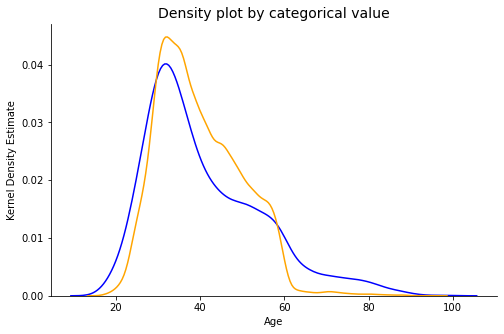

In [16]:
# DENSITY PLOT BY CATEGORICAL VARIABLE

# Draw
fig, ax = plt.subplots(figsize=(8,5))
sns.kdeplot(ds[ds['y']=='yes']['age'], shade=False, color='blue')
sns.kdeplot(ds[ds['y']=='no']['age'], shade=False, color='orange')

# Decoration
sns.despine()
plt.title("Density plot by categorical value", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Kernel Density Estimate")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'DensityPlot2.svg', bbox_inches="tight")

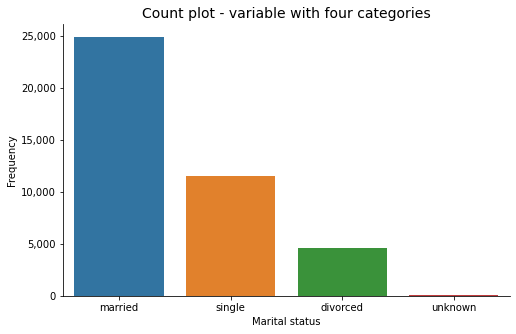

In [17]:
# COUNT PLOT

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(data=ds, x=ds['marital'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Count plot - variable with four categories", fontsize=plots_Title_fontSize)
plt.xlabel("Marital status")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'CountPlot.svg', bbox_inches="tight")

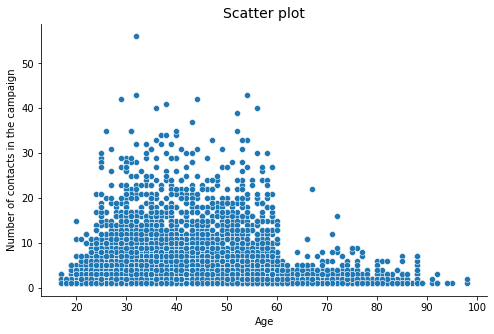

In [18]:
# SCATTER PLOT

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.scatterplot(data=ds, x="age", y="campaign")

# Decoration
sns.despine()
plt.title("Scatter plot", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'ScatterPlot.jpg', dpi=300, bbox_inches="tight")

<ipython-input-19-a4609b5cafe0>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  g = joypy.joyplot(data=ds, column='age', by='marital', ax=ax)


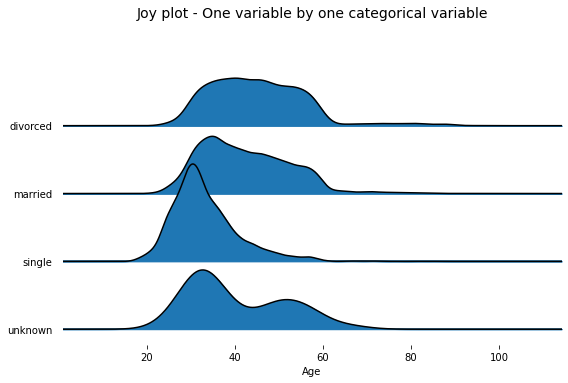

In [19]:
# JOY PLOT - ONE VARIABLE

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = joypy.joyplot(data=ds, column='age', by='marital', ax=ax)

# Decoration
plt.title("Joy plot - One variable by one categorical variable", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'JoyPlotOneVar.svg', bbox_inches="tight")

<ipython-input-20-67a56558d70f>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  g = joypy.joyplot(data=ds, column=['age','campaign'], by='marital', ylim='own',


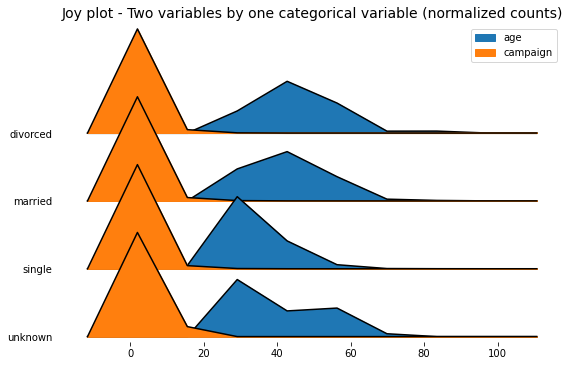

In [20]:
# JOY PLOT - TWO VARIABLES

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = joypy.joyplot(data=ds, column=['age','campaign'], by='marital', ylim='own',
                    kind="normalized_counts",ax=ax, legend=True)

# Decoration
plt.title("Joy plot - Two variables by one categorical variable (normalized counts)", fontsize=plots_Title_fontSize)
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'JoyPlotTwoVar.svg', bbox_inches="tight")

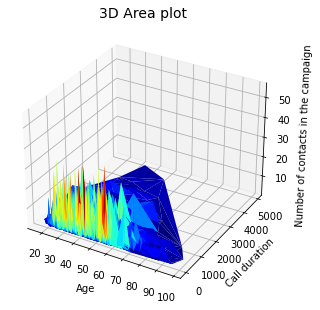

In [21]:
# 3D AREA CHART

# Draw
fig, ax = plt.subplots(figsize=(8,5))
ax = plt.axes(projection='3d')
ax.plot_trisurf(ds['age'], ds['duration'], ds['campaign'], cmap='jet')

# Decoration
plt.title("3D Area plot", fontsize=plots_Title_fontSize)
ax.set_xlabel("Age")
ax.set_ylabel("Call duration")
ax.set_zlabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'3DArea.jpg', dpi=300, bbox_inches="tight")

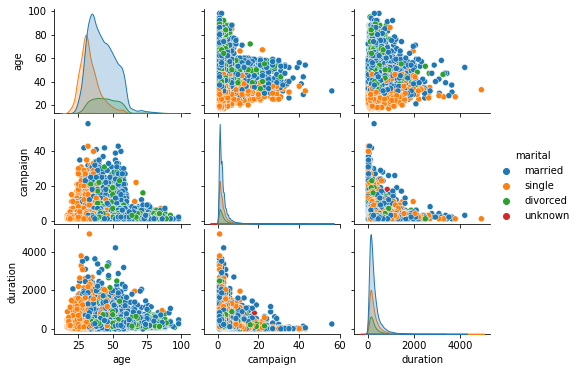

In [22]:
# PAIR PLOT

# Draw
cols = ['age','campaign','duration','marital']
g = sns.pairplot(ds[cols], hue='marital')
g.fig.set_size_inches(8,5)

# Save to file
#g.savefig(fname=exportsFolder+'PairPlot.jpg', dpi=300, bbox_inches="tight")

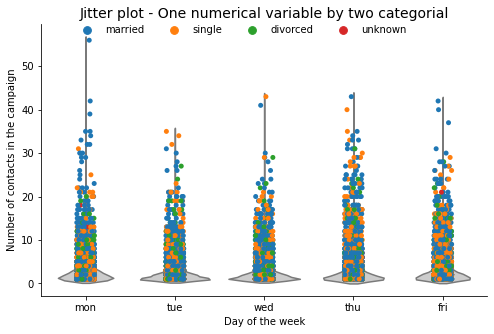

In [23]:
# JITTER PLOT

# Draw
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.violinplot(data=ds, x="day_of_week", y="campaign", inner=None, color=".8")
ax = sns.stripplot(data=ds, x="day_of_week", y="campaign", hue="marital")

# Decoration
sns.despine()
plt.title("Jitter plot - One numerical variable by two categorial", fontsize=plots_Title_fontSize)
plt.xlabel("Day of the week")
plt.ylabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.45, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'JitterPlot.jpg', dpi=300, bbox_inches="tight")

### RELATIONSHIP

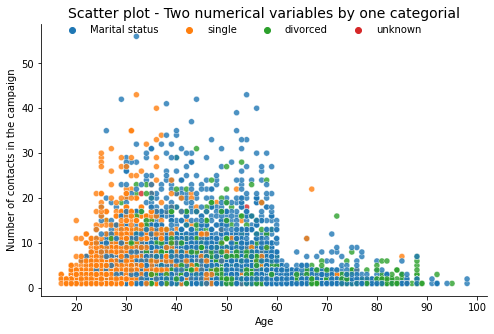

In [24]:
# SCATTER PLOT - BY ONE CATEGORICAL

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.scatterplot(data=ds, x="age", y="campaign", hue="marital", alpha=0.8, legend='brief')

# Decoration
sns.despine()
plt.title("Scatter plot - Two numerical variables by one categorial", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels[0]='Marital status'
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=5, bbox_to_anchor=(0.45, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'ScatterPlotByOneCategory.jpg', dpi=300, bbox_inches="tight")

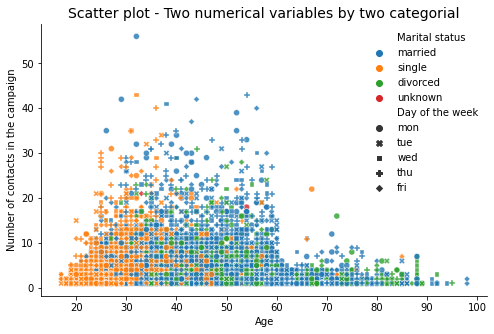

In [25]:
# SCATTER PLOT - BY TWO CATEGORICAL

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.scatterplot(data=ds, x="age", y="campaign", hue="marital", style="day_of_week" ,alpha=0.8)

# Decoration
sns.despine()
plt.title("Scatter plot - Two numerical variables by two categorial", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels[0]='Marital status'
labels[5]='Day of the week'
ax.legend(handles=handles, labels=labels, frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'ScatterPlotByTwoCategorical.jpg', dpi=300, bbox_inches="tight")

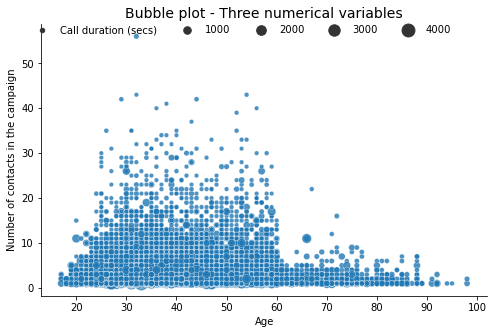

In [26]:
# BUBLE PLOT - THREE NUMERICAL

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.scatterplot(data=ds, x="age", y="campaign", size="duration", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Bubble plot - Three numerical variables", fontsize=plots_Title_fontSize)
plt.xlabel("Age")
plt.ylabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels[0]='Call duration (secs)'
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=5, bbox_to_anchor=(0.45, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'BubllePlotThreeNumerical.jpg', dpi=300, bbox_inches="tight")

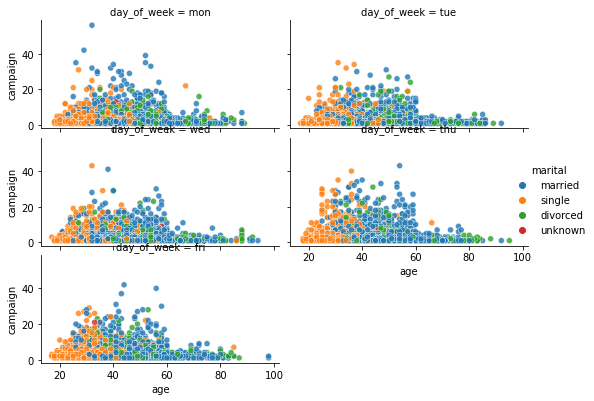

In [27]:
# FACET GRID

# Draw
g = sns.relplot(data=ds, x="age", y="campaign", hue="marital", col="day_of_week", alpha=0.8,
                col_wrap=2)
g.fig.set_size_inches(8,5)

# Decoration
sns.despine()

# Save to file
#g.fig.savefig(fname=exportsFolder+'FacetGrid.jpg', dpi=300, bbox_inches="tight")

### COMPOSITION

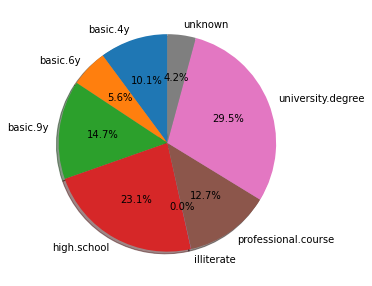

In [28]:
# PIE CHART

# Aggregate
tempDF = ds.groupby('education').agg('count')

# Draw
fig, ax = plt.subplots(figsize=(8,5))
ax.pie(tempDF.age.to_list(), labels=tempDF.index.to_list(),
        autopct='%1.1f%%', shadow=True, startangle=90);


# Save to file
#fig.savefig(fname=exportsFolder+'PieChart.svg', bbox_inches="tight")

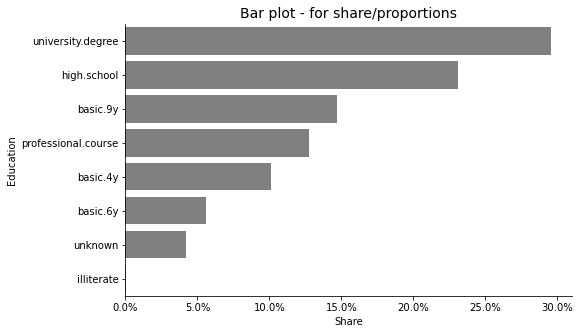

In [29]:
# BAR PLOT - FOR SHARE (Alternative to Pie chart)

# Aggregate and sort
tempDF = pd.DataFrame(data=ds['education'].value_counts(normalize=True)).reset_index()

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot(data=tempDF, y='index', x='education', color='grey')

# Decoration
vals = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(ticker.FixedLocator(vals))
ax.set_xticklabels(['{:,.1%}'.format(x) for x in vals])
sns.despine()
plt.title("Bar plot - for share/proportions", fontsize=plots_Title_fontSize)
plt.xlabel("Share")
plt.ylabel("Education")
plt.rc('axes', labelsize=subPlots_label_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'BarPlotForShare.svg', bbox_inches="tight")

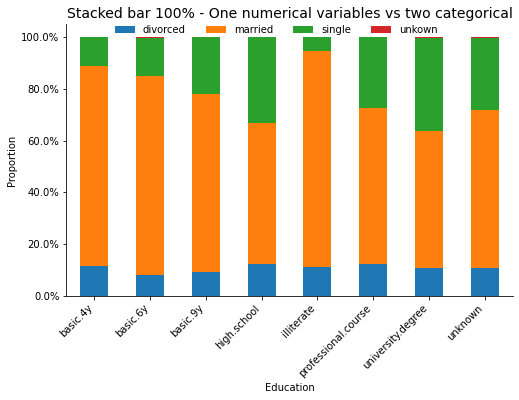

In [30]:
# STACKED BAR PLOT - DISTRIBUTION

# Aggregate and sort
tempDF = ds.pivot_table(values=['age'], 
                      index='education',
                      columns='marital',
                      aggfunc='count',
                      fill_value=0)
tempDF = tempDF.div(tempDF.sum(1), axis=0)

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = tempDF.plot(kind='bar', stacked=True, ax=ax)

# Decoration
vals = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(vals))
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
sns.despine()
plt.title("Stacked bar 100% - One numerical variables vs two categorical", fontsize=plots_Title_fontSize)
plt.xlabel("Education")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels = ['divorced', 'married', 'single', 'unkown']
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'StackedBar100Percent.svg', bbox_inches="tight")

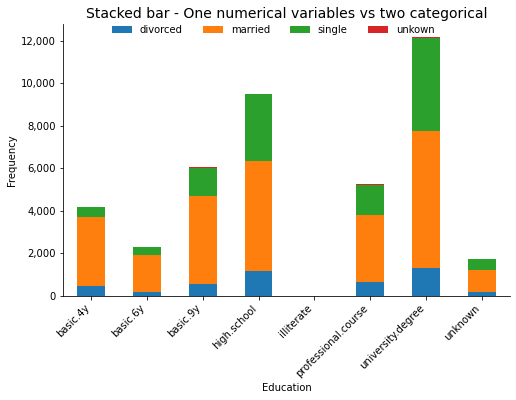

In [31]:
# STACKED BAR PLOT

# Aggregate and sort
tempDF = ds.pivot_table(values=['age'], 
                      index='education',
                      columns='marital',
                      aggfunc='count',
                      fill_value=0)
# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = tempDF.plot(kind='bar', stacked=True, ax=ax)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Stacked bar - One numerical variables vs two categorical", fontsize=plots_Title_fontSize)
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels = ['divorced', 'married', 'single', 'unkown']
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'StackedBar.svg', bbox_inches="tight")

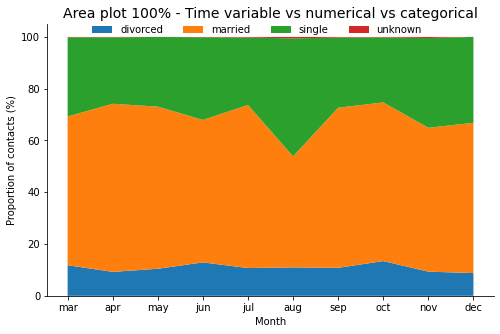

In [32]:
# AREA PLOT - DISTRIBUTION

# Aggregate and sort
tempDF = ds.pivot_table(values=['age'], 
                      index='month',
                      columns='marital',
                      aggfunc='count',
                      fill_value=0)
tempDF = tempDF.div(tempDF.sum(1), axis=0).mul(100, axis=0)
months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
y = np.vstack([tempDF['age']['divorced'], tempDF['age']['married'],
                    tempDF['age']['single'],tempDF['age']['unknown']])
labels = ['divorced', 'married', 'single', 'unknown']

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = ax.stackplot(months, tempDF['age']['divorced'], tempDF['age']['married'],
                    tempDF['age']['single'],tempDF['age']['unknown'], labels=labels)

# Decoration
sns.despine()
plt.title("Area plot 100% - Time variable vs numerical vs categorical", fontsize=plots_Title_fontSize)
plt.xlabel("Month")
plt.ylabel("Proportion of contacts (%)")
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'AreaChart100Percent.svg', bbox_inches="tight")

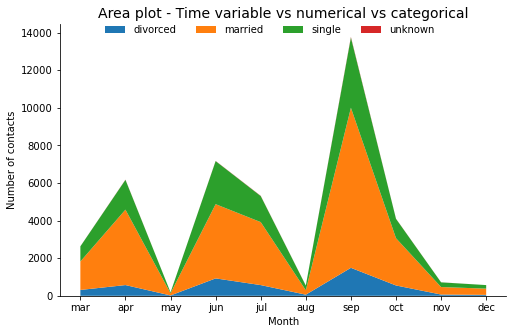

In [33]:
# AREA PLOT

# Aggregate and sort
tempDF = ds.pivot_table(values=['age'], 
                      index='month',
                      columns='marital',
                      aggfunc='count',
                      fill_value=0)
months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
y = np.vstack([tempDF['age']['divorced'], tempDF['age']['married'],
                    tempDF['age']['single'],tempDF['age']['unknown']])
labels = ['divorced', 'married', 'single', 'unknown']

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = ax.stackplot(months, tempDF['age']['divorced'], tempDF['age']['married'],
                    tempDF['age']['single'],tempDF['age']['unknown'], labels=labels)

# Decoration
sns.despine()
plt.title("Area plot - Time variable vs numerical vs categorical", fontsize=plots_Title_fontSize)
plt.xlabel("Month")
plt.ylabel("Number of contacts")
plt.rc('axes', labelsize=subPlots_label_fontSize)
ax.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'AreaChart.svg', bbox_inches="tight")

### COMPARISON

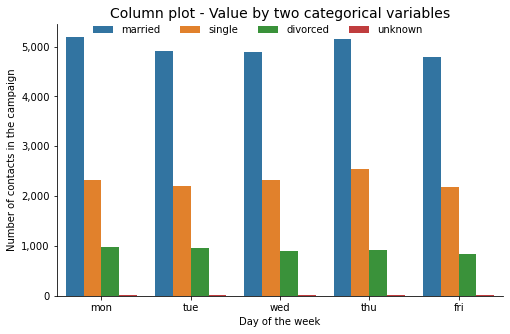

In [34]:
# COLUMN PLOT

# Draw
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(data=ds, x="day_of_week", hue="marital")

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Column plot - Value by two categorical variables", fontsize=plots_Title_fontSize)
plt.xlabel("Day of the week")
plt.ylabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.45, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'ColumnPlot.svg', bbox_inches="tight")

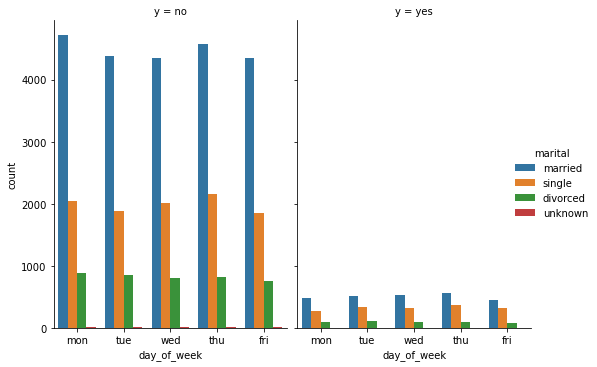

In [35]:
# COLUMN PLOT - FACET

# Draw
g = sns.catplot(data=ds, x="day_of_week", hue="marital", col="y", kind="count")
g.fig.set_size_inches(8,5)

# Decoration
sns.despine()

# Save to file
#g.fig.savefig(fname=exportsFolder+'ColumnPlotFacet.svg', bbox_inches="tight")

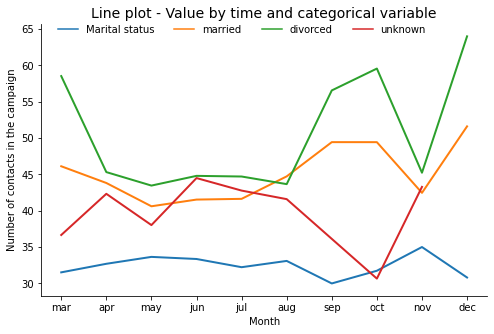

In [36]:
# LINE PLOT

# Aggreagate
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
ds['month'] = pd.Categorical(ds['month'], categories=months, ordered=True)
ds.sort_values(by='month',inplace=True)
tempDF=ds.groupby(['month','marital']).agg('count')['age'].reset_index()
tempDF

# Draw
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(data=ds, x="month", y="age", hue="marital",
             lw=2, ci=None, ax=ax)

# Decoration
sns.despine()
plt.title("Line plot - Value by time and categorical variable", fontsize=plots_Title_fontSize)
plt.xlabel("Month")
plt.ylabel("Number of contacts in the campaign")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels[0]='Marital status'
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=5, bbox_to_anchor=(0.45, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'LinePlot.svg', bbox_inches="tight")

### OTHER PLOTS

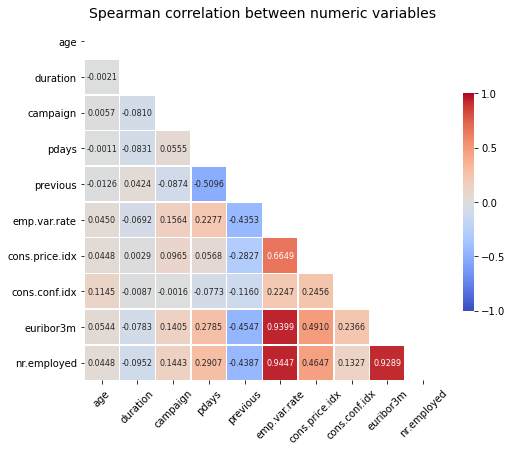

In [37]:
# CORRELATION

# Create correlation matrix
corr = ds[numerical].corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(8, 10))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.4f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})